# Gender Recognition via Voice
## Team Skepsis
### Members - Sagnik Mitra, Sneharup Mukherjee, Spandan Pal

## Algorithm used to Analyze the Data and Determining which will work the best for preparing the Model

* K-Nearest Neighbors  
* Naive Bayes  
* Decision Tree  
* Random Forest  
* XgBoost  
* Support Vector Machine  
* Neural Network

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['d', 'voicegender']


In [82]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv('../input/voicegender/voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [83]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [84]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Preprocessing: label encoder and normalization

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [86]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0
5,0.441173,0.631448,0.432029,0.274076,0.722901,0.534679,0.051782,0.004773,0.922681,0.870197,0.401984,0.441173,0.299699,0.037761,0.857144,0.098448,0.006452,0.124375,0.124464,0.134238,1.0
6,0.526061,0.578887,0.595932,0.375003,0.706098,0.413441,0.040161,0.002997,0.940728,0.900382,0.307846,0.526061,0.276701,0.084682,0.929285,0.159942,0.006452,0.242673,0.242847,0.132985,1.0
7,0.572113,0.602659,0.532916,0.446359,0.819942,0.449670,0.036301,0.002064,0.906544,0.847309,0.458300,0.572113,0.205893,0.041084,0.233218,0.099505,0.006452,0.024303,0.024320,0.304531,1.0
8,0.485814,0.615573,0.509942,0.356014,0.718545,0.445258,0.027701,0.001531,0.953672,0.910746,0.782511,0.485814,0.226085,0.042110,0.834600,0.111416,0.006452,0.098642,0.098712,0.159026,1.0
9,0.448457,0.639632,0.441466,0.304920,0.689783,0.470487,0.030322,0.002079,0.972260,0.952323,0.041781,0.448457,0.276351,0.049021,0.904450,0.112734,0.023656,0.214439,0.214235,0.096442,1.0


Visualization

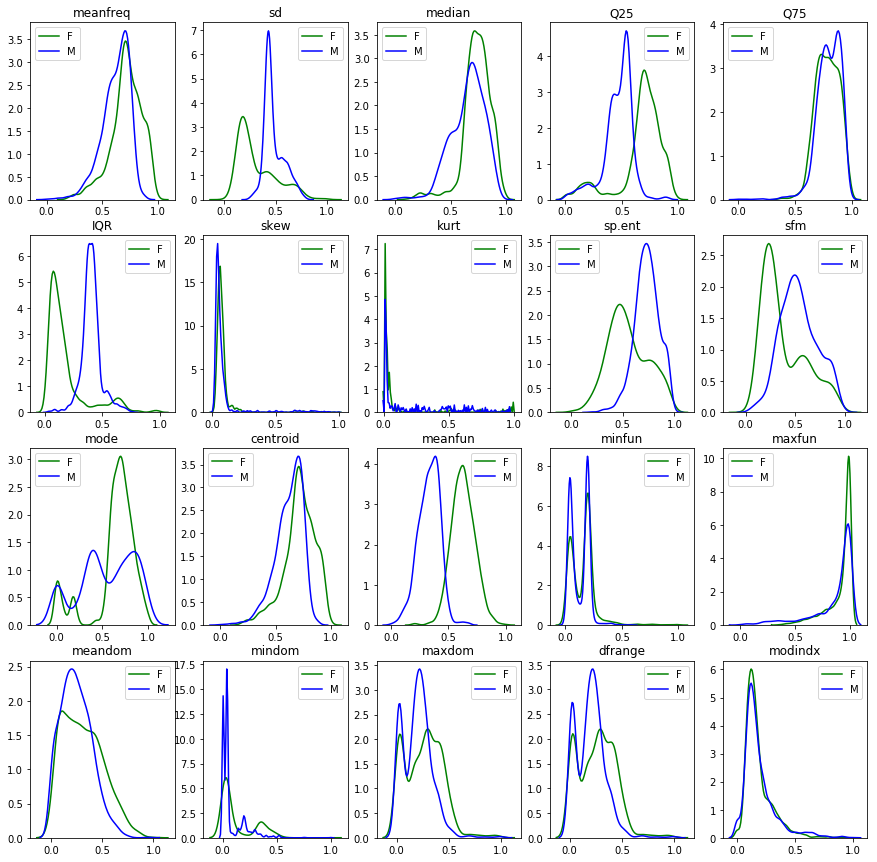

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

In [88]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [89]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [90]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1902,0.655618,0.431806,0.720242,0.635179,0.749730,0.185241,0.087345,0.019196,0.757589,0.560180,0.000000,0.655618,0.489296,0.030185,0.857144,0.046168,0.006452,0.048964,0.048999,0.154271,0.0
2973,0.649312,0.399073,0.671760,0.596790,0.710743,0.187341,0.044096,0.002748,0.802946,0.617489,0.653342,0.649312,0.495910,0.068824,0.871017,0.416743,0.301075,0.146623,0.140603,0.556030,0.0
795,0.608960,0.442762,0.647954,0.453057,0.770763,0.395005,0.032982,0.001682,0.825752,0.647350,0.732143,0.608960,0.285665,0.031221,0.929285,0.185058,0.058065,0.166548,0.165594,0.175146,1.0
2511,0.739110,0.150093,0.732293,0.732140,0.736351,0.071447,0.062877,0.004432,0.419800,0.239187,0.695055,0.739110,0.640300,0.204365,0.990585,0.611785,0.040860,0.398499,0.398069,0.100026,0.0
1124,0.706059,0.432900,0.737513,0.557801,0.867717,0.380136,0.039199,0.002270,0.701775,0.418515,0.501377,0.706059,0.425803,0.211379,0.963717,0.287513,0.040860,0.398499,0.398069,0.105872,1.0


In [91]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [92]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [93]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    a = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",a)
    return a
    
    

In [95]:
 
accli=pd.read_csv('../input/accuracylist/Accuracy_List.csv')
accli.set_index("Algorithm", inplace = True)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = 0
accli.at['Decision Tree', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Decision Tree', 'Accuracy (considering all attributes)'] = 0
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = 0
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = 0

accli


,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.0,0.0
Naïve Bayes,0.0,0.0
Decision Tree,0.0,0.0
Random Forest,0.0,0.0
XgBoost,0.0,0.0
Support Vector Machine,0.0,0.0
Neural Network (MLP Classifier),0.0,0.0


In [96]:
list = accli.index
list

Index(['K-Nearest Neighbours', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
       'XgBoost', 'Support Vector Machine', 'Neural Network (MLP Classifier)'],
      dtype='object', name='Algorithm')

## K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [97]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.017875920084121977 occurs at k=4.


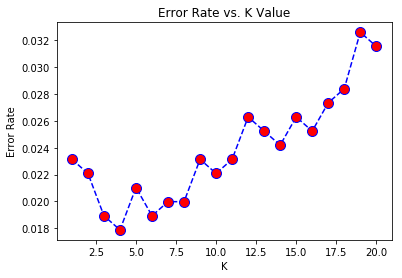

In [98]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [100]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9837    0.9817    0.9827       493
        male     0.9804    0.9825    0.9815       458

   micro avg     0.9821    0.9821    0.9821       951
   macro avg     0.9821    0.9821    0.9821       951
weighted avg     0.9821    0.9821    0.9821       951

Accuracy: 0.982124079915878


Lowest error is 0.027339642481598318 occurs at k=8.


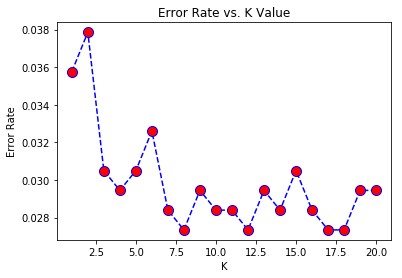

In [101]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [102]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9642    0.9838    0.9739       493
        male     0.9821    0.9607    0.9713       458

   micro avg     0.9727    0.9727    0.9727       951
   macro avg     0.9732    0.9722    0.9726       951
weighted avg     0.9728    0.9727    0.9726       951

Accuracy: 0.9726603575184016


## Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [103]:
model=naive_bayes.GaussianNB()
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.8970    0.9006    0.8988       493
        male     0.8925    0.8886    0.8906       458

   micro avg     0.8948    0.8948    0.8948       951
   macro avg     0.8948    0.8946    0.8947       951
weighted avg     0.8948    0.8948    0.8948       951

Accuracy: 0.8948475289169295


In [104]:
model=naive_bayes.GaussianNB()
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9735    0.9696    0.9715       493
        male     0.9674    0.9716    0.9695       458

   micro avg     0.9706    0.9706    0.9706       951
   macro avg     0.9705    0.9706    0.9705       951
weighted avg     0.9706    0.9706    0.9706       951

Accuracy: 0.9705573080967402


## Decision Tree
Using tree.DecisionTreeClassifier() to build the model.

In [105]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.03995793901156677 occurs at n=9.


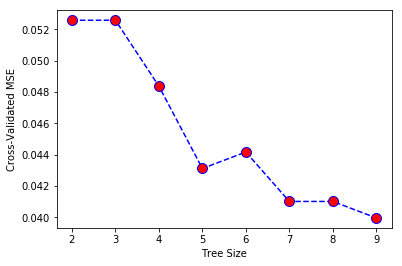

In [106]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [107]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
t = classify(pruned_tree,x_train,y_train,x_test,y_test)
accli.at['Decision Tree', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9523    0.9716    0.9618       493
        male     0.9688    0.9476    0.9581       458

   micro avg     0.9600    0.9600    0.9600       951
   macro avg     0.9605    0.9596    0.9600       951
weighted avg     0.9602    0.9600    0.9600       951

Accuracy: 0.9600420609884333


Lowest error is 0.031545741324921134 occurs at n=10.


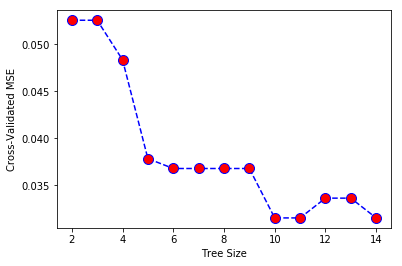

In [108]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [109]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
t = classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)
accli.at['Decision Tree', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9621    0.9777    0.9698       493
        male     0.9756    0.9585    0.9670       458

   micro avg     0.9685    0.9685    0.9685       951
   macro avg     0.9688    0.9681    0.9684       951
weighted avg     0.9686    0.9685    0.9684       951

Accuracy: 0.9684542586750788


## Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [110]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.017875920084121977 occurs at n=81.


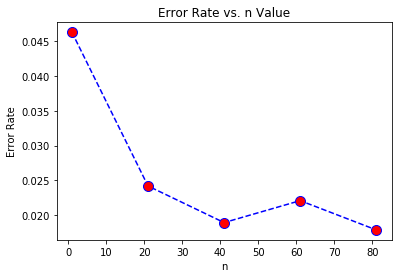

In [111]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [112]:
model=ensemble.RandomForestClassifier(n_estimators = e)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9759    0.9858    0.9808       493
        male     0.9845    0.9738    0.9791       458

   micro avg     0.9800    0.9800    0.9800       951
   macro avg     0.9802    0.9798    0.9800       951
weighted avg     0.9801    0.9800    0.9800       951

Accuracy: 0.9800210304942166


Lowest error is 0.028391167192429023 occurs at n=41.


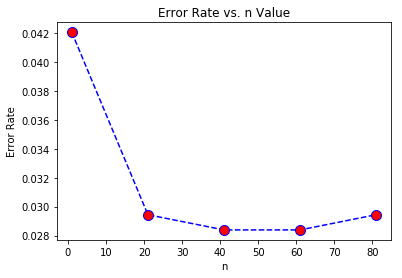

In [113]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

In [114]:
model=ensemble.RandomForestClassifier(n_estimators = e)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9680    0.9817    0.9748       493
        male     0.9800    0.9651    0.9725       458

   micro avg     0.9737    0.9737    0.9737       951
   macro avg     0.9740    0.9734    0.9737       951
weighted avg     0.9738    0.9737    0.9737       951

Accuracy: 0.9737118822292324


## XgBoost
Using xgboost.XGBClassifier() to build the model.

In [115]:
model = xgboost.XGBClassifier()
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9758    0.9817    0.9788       493
        male     0.9802    0.9738    0.9770       458

   micro avg     0.9779    0.9779    0.9779       951
   macro avg     0.9780    0.9778    0.9779       951
weighted avg     0.9779    0.9779    0.9779       951

Accuracy: 0.9779179810725552


In [116]:
model = xgboost.XGBClassifier()
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9583    0.9797    0.9689       493
        male     0.9776    0.9541    0.9657       458

   micro avg     0.9674    0.9674    0.9674       951
   macro avg     0.9680    0.9669    0.9673       951
weighted avg     0.9676    0.9674    0.9674       951

Accuracy: 0.9674027339642481


## Support Vector Machine
Using svm.SVC() to build the model.

In [117]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [118]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [119]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9670726206585476
rbf  out-of-sample accuracy in SVM:  0.9758149316508938
poly  in-sample accuracy in SVM:  0.8737032025259359
poly  out-of-sample accuracy in SVM:  0.8717139852786541
linear  in-sample accuracy in SVM:  0.9747406405051872
linear  out-of-sample accuracy in SVM:  0.9779179810725552
Highest accuracy is 0.9779179810725552 occurs at linear kernel.


Lowest error is 0.022082018927444796 occurs at C=1.


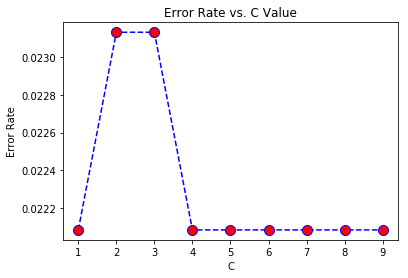

In [120]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [121]:
model=svm.SVC(kernel=k,C=c)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9816    0.9757    0.9786       493
        male     0.9740    0.9803    0.9771       458

   micro avg     0.9779    0.9779    0.9779       951
   macro avg     0.9778    0.9780    0.9779       951
weighted avg     0.9779    0.9779    0.9779       951

Accuracy: 0.9779179810725552


In [122]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9670726206585476
rbf  out-of-sample accuracy in SVM:  0.9737118822292324
poly  in-sample accuracy in SVM:  0.9373026612539468
poly  out-of-sample accuracy in SVM:  0.9484752891692955
linear  in-sample accuracy in SVM:  0.9648173207036536
linear  out-of-sample accuracy in SVM:  0.9695057833859095
Highest accuracy is 0.9737118822292324 occurs at rbf kernel.


Lowest error is 0.026288117770767613 occurs at C=1.


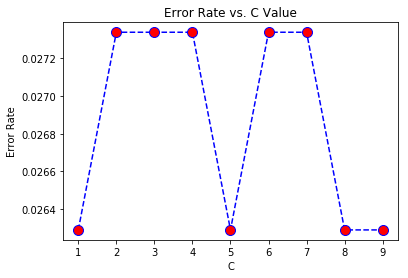

In [123]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [124]:
model=svm.SVC(kernel=k,C=c)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = t


              precision    recall  f1-score   support

      female     0.9795    0.9696    0.9745       493
        male     0.9676    0.9782    0.9729       458

   micro avg     0.9737    0.9737    0.9737       951
   macro avg     0.9736    0.9739    0.9737       951
weighted avg     0.9738    0.9737    0.9737       951

Accuracy: 0.9737118822292324


## Neural Network
Using neural_network.MLPClassifier to build the model.

In [ ]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.019978969505783387 occurs at C=13.


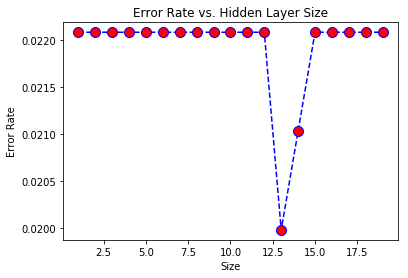

In [126]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [127]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9817    0.9797    0.9807       493
        male     0.9782    0.9803    0.9793       458

   micro avg     0.9800    0.9800    0.9800       951
   macro avg     0.9800    0.9800    0.9800       951
weighted avg     0.9800    0.9800    0.9800       951

Accuracy: 0.9800210304942166


Lowest error is 0.029442691903259727 occurs at C=6.


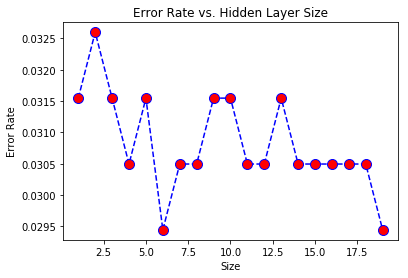

In [128]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [129]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9716    0.9716    0.9716       493
        male     0.9694    0.9694    0.9694       458

   micro avg     0.9706    0.9706    0.9706       951
   macro avg     0.9705    0.9705    0.9705       951
weighted avg     0.9706    0.9706    0.9706       951

Accuracy: 0.9705573080967402


In [130]:
accli

,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.972660,0.982124
Naïve Bayes,0.970557,0.894848
Decision Tree,0.968454,0.960042
Random Forest,0.973712,0.980021
XgBoost,0.967403,0.977918
Support Vector Machine,0.973712,0.977918
Neural Network (MLP Classifier),0.970557,0.980021


In [131]:
print(accli.index)

Index(['K-Nearest Neighbours', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
       'XgBoost', 'Support Vector Machine', 'Neural Network (MLP Classifier)'],
      dtype='object', name='Algorithm')


In [ ]:
# importing pandas library 
import pandas as pd 
# import matplotlib library 
import matplotlib.pyplot as plt 
%matplotlib inline
accli.plot(x='Algorithm', y=['Accuracy (considering only IQR, meanfun & Q25)','Accuracy (considering all attributes)'], kind="bar") 

KeyError: 'Algorithm'